In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

36.07644621724906 -64.15730084501678
-60.29402220226913 -24.548304268074475
32.2274123576164 -54.045354728558024
-41.71720402992529 -88.95358541450885
-9.73131577807267 -151.60565485624494
57.655964775420586 -21.59340106232537
56.14169084375493 -103.15811559720336
-47.38127516429486 64.50113457226271
-24.866315987236334 25.609102771106052
13.863496825152154 -147.13629299595144
72.0680238223843 -17.272906665480093
17.114561377084627 39.64564271944462
-11.172147902574636 139.43876108338287
31.127559739001853 118.42744825996982
24.774344495427712 38.00896182445911
-28.148830847428385 0.7227637502689106
-39.07403802173978 -78.22226899950817
-29.176851248106836 -155.94257999928695
62.19870357468383 46.19161358718034
25.158822507607468 38.61833322939435
-69.01646588255589 -59.527382335462335
-47.837216794008306 94.1463264390938
-64.85418558178503 111.32432399467297
-22.902102594261976 -75.69844715786908
17.20797216253935 -12.562688126219484
-32.95241566955926 -175.65421592712528
-88.03977491

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | flin flon
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | thamaga
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | ginda
Processing Record 12 of Set 1 | nhulunbuy
Processing Record 13 of Set 1 | wuhu
Processing Record 14 of Set 1 | umm lajj
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | avera
Processing Record 18 of Set 1 | krasnoborsk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | antofagasta
Processing Recor

Processing Record 36 of Set 4 | aksarka
Processing Record 37 of Set 4 | vermillion
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | aligudarz
Processing Record 40 of Set 4 | merauke
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | nuuk
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | gamba
Processing Record 46 of Set 4 | miquelon
Processing Record 47 of Set 4 | truth or consequences
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | kallithiron
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | seoul
Processing Record 4 of Set 5 | horizontina
Processing Record 5 of Set 5 | puerto baquerizo moreno
Processing Record 6 of Set 5 | luwuk
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | butaritari
Pro

Processing Record 24 of Set 8 | isilkul
Processing Record 25 of Set 8 | areia branca
Processing Record 26 of Set 8 | husavik
Processing Record 27 of Set 8 | kizukuri
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | formosa
Processing Record 30 of Set 8 | saiha
Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | rio gallegos
Processing Record 33 of Set 8 | urusha
Processing Record 34 of Set 8 | yeniseysk
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | mokhsogollokh
Processing Record 37 of Set 8 | tacoronte
Processing Record 38 of Set 8 | salalah
Processing Record 39 of Set 8 | ituni
City not found. Skipping...
Processing Record 40 of Set 8 | berlevag
Processing Record 41 of Set 8 | tukrah
Processing Record 42 of Set 8 | aguilas
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | segou
Processing Record 45 of Set 8 | praia da vitoria
Processing Record 46 of Set 8 | san ramon
Processing Record 47 of Set

Processing Record 16 of Set 12 | moose jaw
Processing Record 17 of Set 12 | puerto quijarro
Processing Record 18 of Set 12 | ariquemes
Processing Record 19 of Set 12 | ust-kuyga
Processing Record 20 of Set 12 | yar-sale
Processing Record 21 of Set 12 | harlingen
Processing Record 22 of Set 12 | benghazi
Processing Record 23 of Set 12 | kristiansund
Processing Record 24 of Set 12 | vila
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | murgab
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | birganj
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | chapada dos guimaraes
Processing Record 31 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 32 of Set 12 | grand-lahou
Processing Record 33 of Set 12 | yuzhno-kurilsk
Processing Record 34 of Set 12 | byron bay
Processing Record 35 of Set 12 | zhuhai
Processing Record 36 of Set 12 | evensk
Processing Record 37 of Set 12 | mayor pablo l

In [11]:
len(city_data)

596

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,50.43,38,0,6.91,US,2022-11-14 18:55:02
1,Chuy,-33.6971,-53.4616,66.83,78,91,16.31,UY,2022-11-14 18:56:14
2,Ancud,-41.8697,-73.8203,54.48,97,100,17.40,CL,2022-11-14 18:53:12
3,Faanui,-16.4833,-151.7500,77.97,81,100,10.31,PF,2022-11-14 18:56:14
4,Vestmannaeyjar,63.4427,-20.2734,47.39,93,75,23.02,IS,2022-11-14 18:56:15
5,Flin Flon,54.7682,-101.8650,10.24,85,75,0.00,CA,2022-11-14 18:56:15
6,Saint-Philippe,-21.3585,55.7679,71.19,79,94,15.93,RE,2022-11-14 18:54:35
7,Thamaga,-24.6701,25.5397,74.43,52,13,10.54,BW,2022-11-14 18:56:15
8,Hilo,19.7297,-155.0900,80.26,75,75,5.75,US,2022-11-14 18:52:15
9,Ginda,30.6945,78.4932,46.62,84,100,3.65,IN,2022-11-14 18:56:16


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-11-14 18:55:02,37.1041,-113.5841,50.43,38,0,6.91
1,Chuy,UY,2022-11-14 18:56:14,-33.6971,-53.4616,66.83,78,91,16.31
2,Ancud,CL,2022-11-14 18:53:12,-41.8697,-73.8203,54.48,97,100,17.40
3,Faanui,PF,2022-11-14 18:56:14,-16.4833,-151.7500,77.97,81,100,10.31
4,Vestmannaeyjar,IS,2022-11-14 18:56:15,63.4427,-20.2734,47.39,93,75,23.02
5,Flin Flon,CA,2022-11-14 18:56:15,54.7682,-101.8650,10.24,85,75,0.00
6,Saint-Philippe,RE,2022-11-14 18:54:35,-21.3585,55.7679,71.19,79,94,15.93
7,Thamaga,BW,2022-11-14 18:56:15,-24.6701,25.5397,74.43,52,13,10.54
8,Hilo,US,2022-11-14 18:52:15,19.7297,-155.0900,80.26,75,75,5.75
9,Ginda,IN,2022-11-14 18:56:16,30.6945,78.4932,46.62,84,100,3.65


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

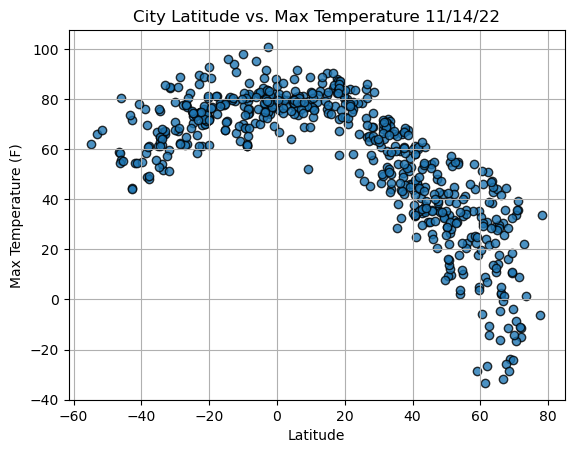

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

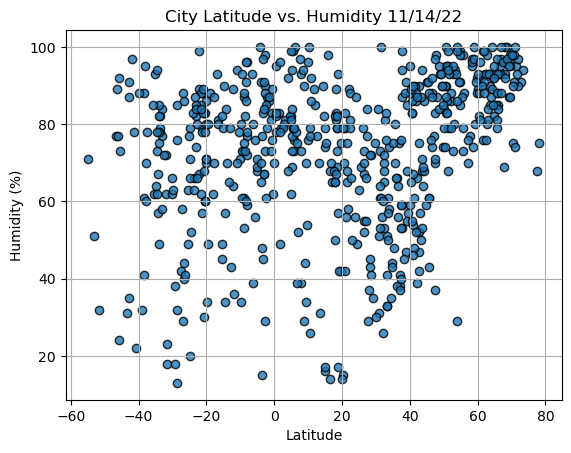

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

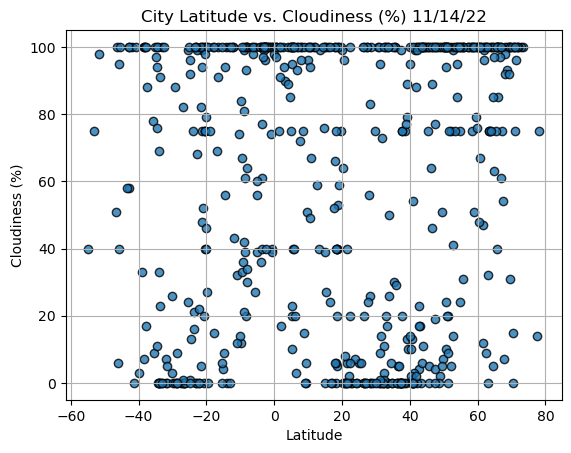

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

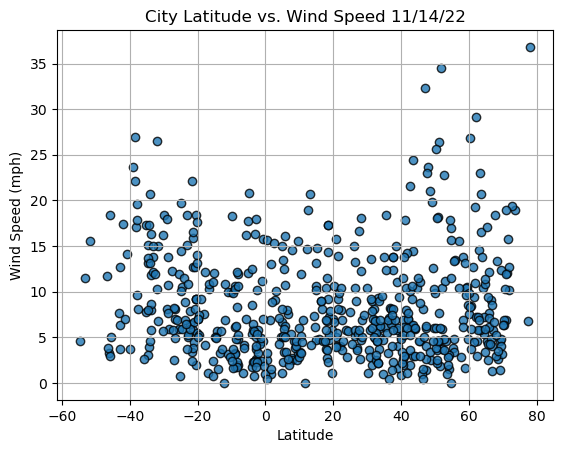

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]


In [23]:
city_data_df["Lat"] >=0

0       True
1      False
2      False
3      False
4       True
       ...  
591     True
592     True
593     True
594     True
595     True
Name: Lat, Length: 596, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-11-14 18:55:02,37.1041,-113.5841,50.43,38,0,6.91
4,Vestmannaeyjar,IS,2022-11-14 18:56:15,63.4427,-20.2734,47.39,93,75,23.02
5,Flin Flon,CA,2022-11-14 18:56:15,54.7682,-101.8650,10.24,85,75,0.00
8,Hilo,US,2022-11-14 18:52:15,19.7297,-155.0900,80.26,75,75,5.75
9,Ginda,IN,2022-11-14 18:56:16,30.6945,78.4932,46.62,84,100,3.65


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

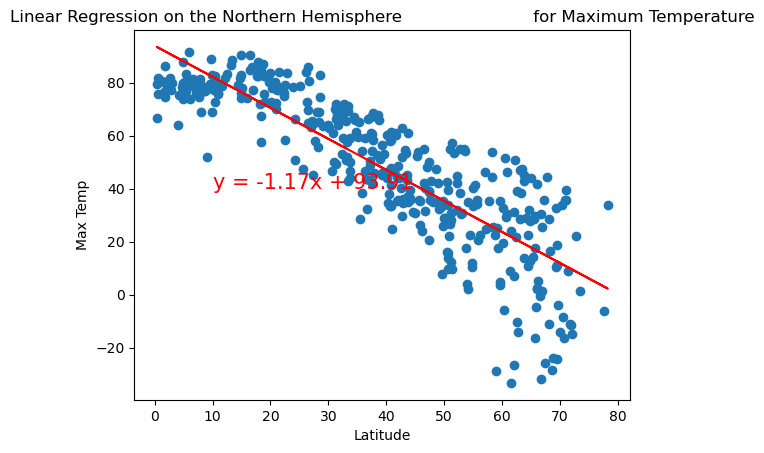

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

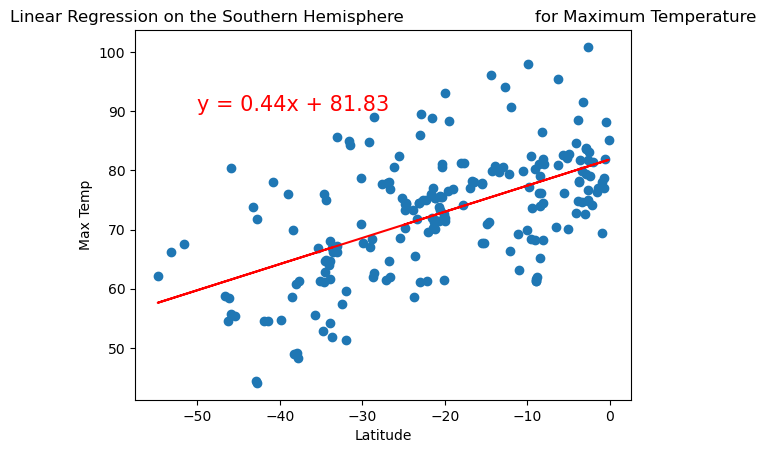

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

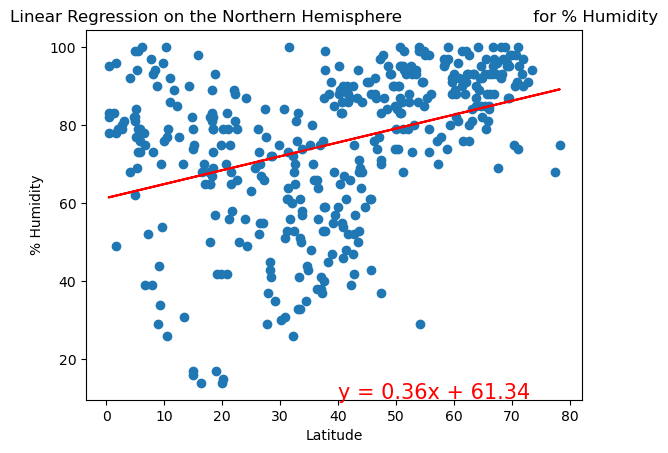

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

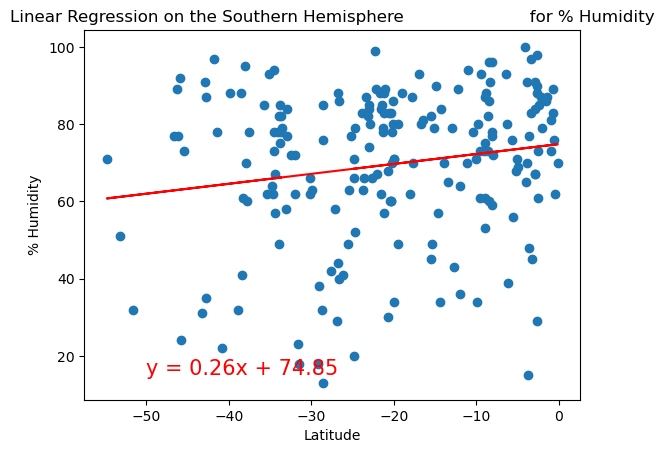

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

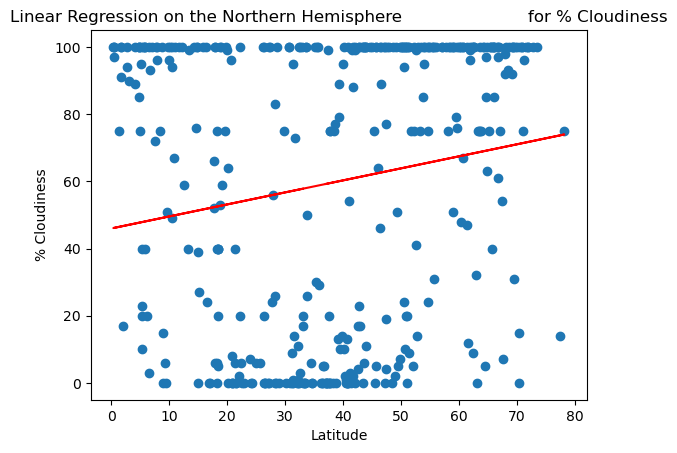

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

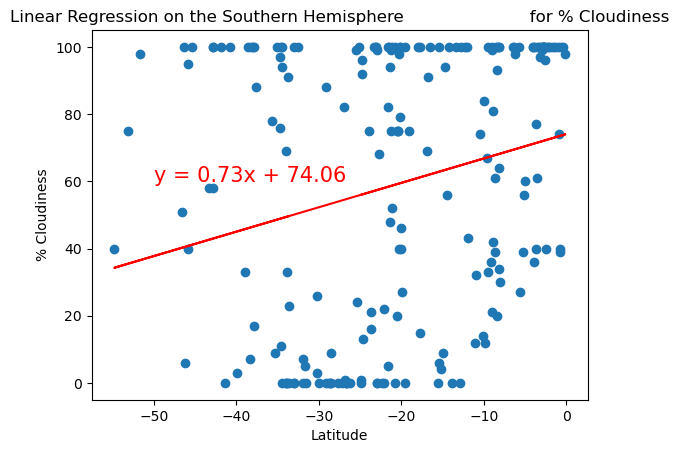

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \
                       for % Cloudiness''', '% Cloudiness',(-50,60))

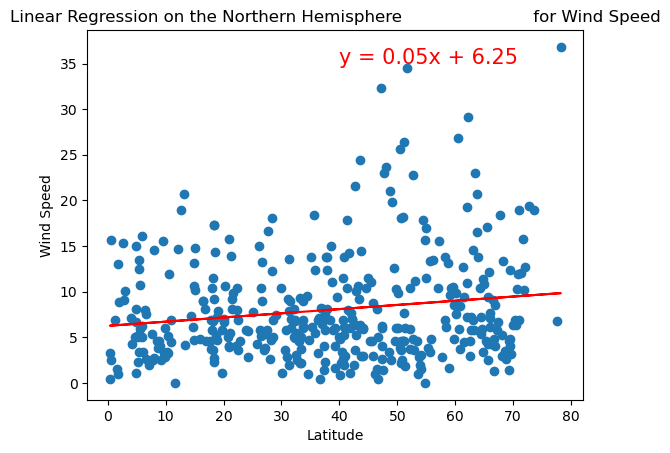

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \
                        for Wind Speed''', 'Wind Speed',(40,35))

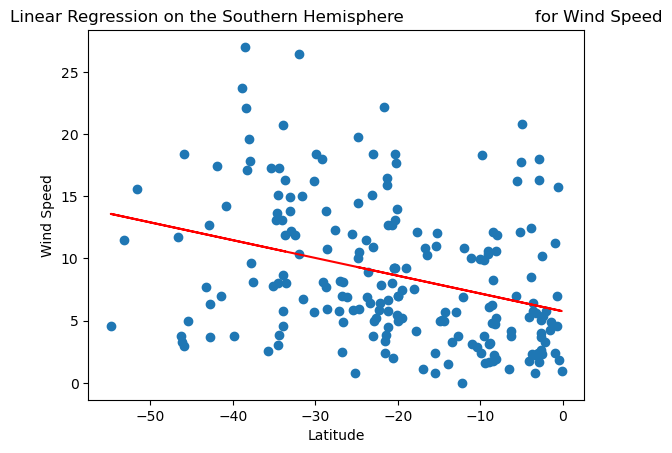

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \
                        for Wind Speed''', 'Wind Speed',(-50,35))